This cell loads and explores the **Diabetes dataset** using **Pandas**.

#### Steps:

1. **Import Pandas** – for data handling.
2. **Load CSV:**

   ```python
   df = pd.read_csv("diabetes.csv")
   ```
3. **Preview data:** `df.head()`
4. **Check shape:** `df.shape` → rows × columns.
5. **View column names:** `df.columns`
6. **Get stats:** `df.describe()` → mean, std, min, max, etc.

In [13]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
print(df.head())
print(df.shape)
print(df.columns)
print("\n📊 Descriptive Statistics:\n", df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

📊 Descriptive Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.00000

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### README: Correlation Heatmap

This cell visualizes the **correlation** between numerical features in the dataset.

####  Steps:

1. **Set figure size:** `(10, 6)` for better readability.
2. **Plot heatmap:**

   * `df.corr()` computes pairwise correlations.
   * `annot=True` shows correlation values.
   * `cmap="coolwarm"` gives a red–blue gradient.
3. **Add title** and display using `plt.show()`.

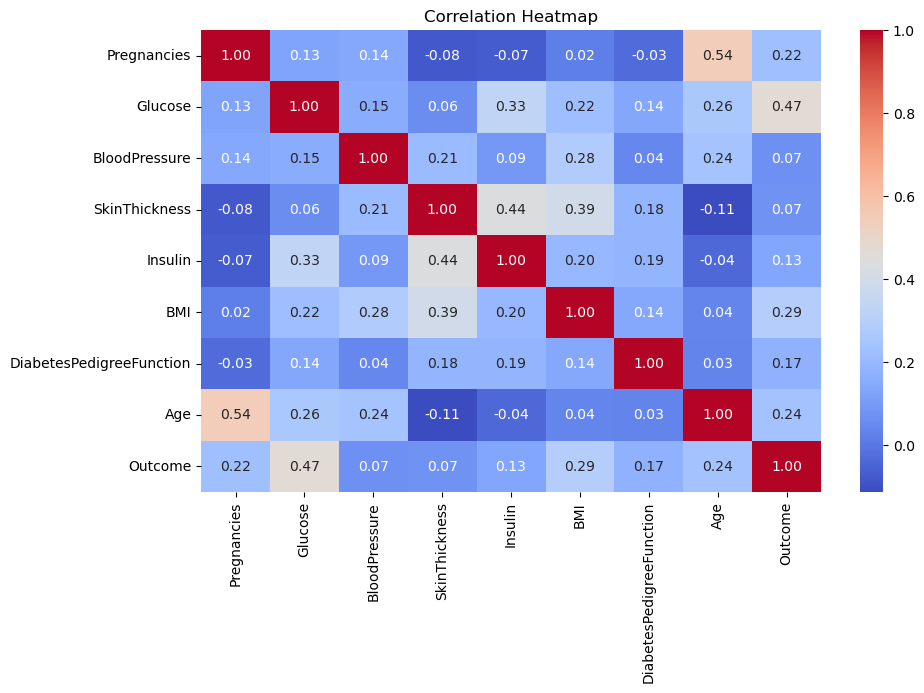

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
# Missing values
print("\n🔍 Missing Values:\n", df.isnull().sum())

# Duplicates
print("\n🔁 Number of Duplicate Rows:", df.duplicated().sum())
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=0)
outlier_summary = pd.DataFrame({"Feature": df.columns, "Outliers (Z>3)": outliers})
print("\n⚠️ Outlier Summary:\n", outlier_summary)


🔍 Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

🔁 Number of Duplicate Rows: 0

⚠️ Outlier Summary:
                     Feature  Outliers (Z>3)
0               Pregnancies               4
1                   Glucose               5
2             BloodPressure              35
3             SkinThickness               1
4                   Insulin              18
5                       BMI              14
6  DiabetesPedigreeFunction              11
7                       Age               5
8                   Outcome               0


####  Steps:

1. **Histograms:**

   * `df.hist()` shows value distributions of each feature.
   * Helps detect skewness and outliers.

2. **Pair Plot:**

   * `sns.pairplot()` visualizes pairwise relationships between features.
   * `hue=target_col` colors points by class (Outcome).
   * `diag_kind="hist"` shows histograms on the diagonal.

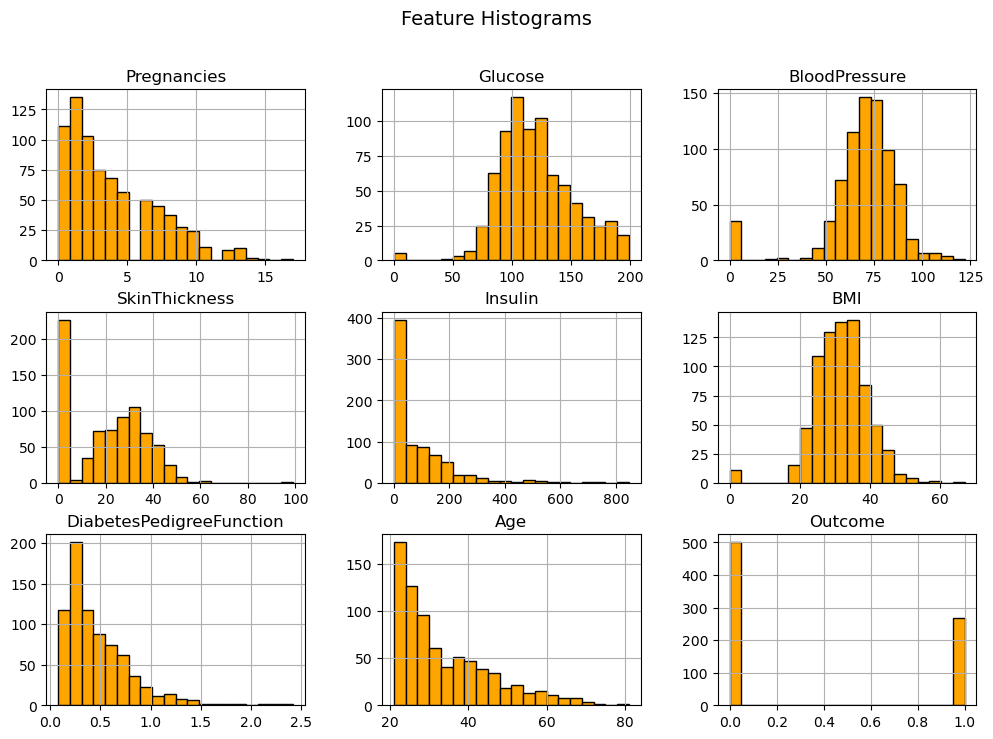

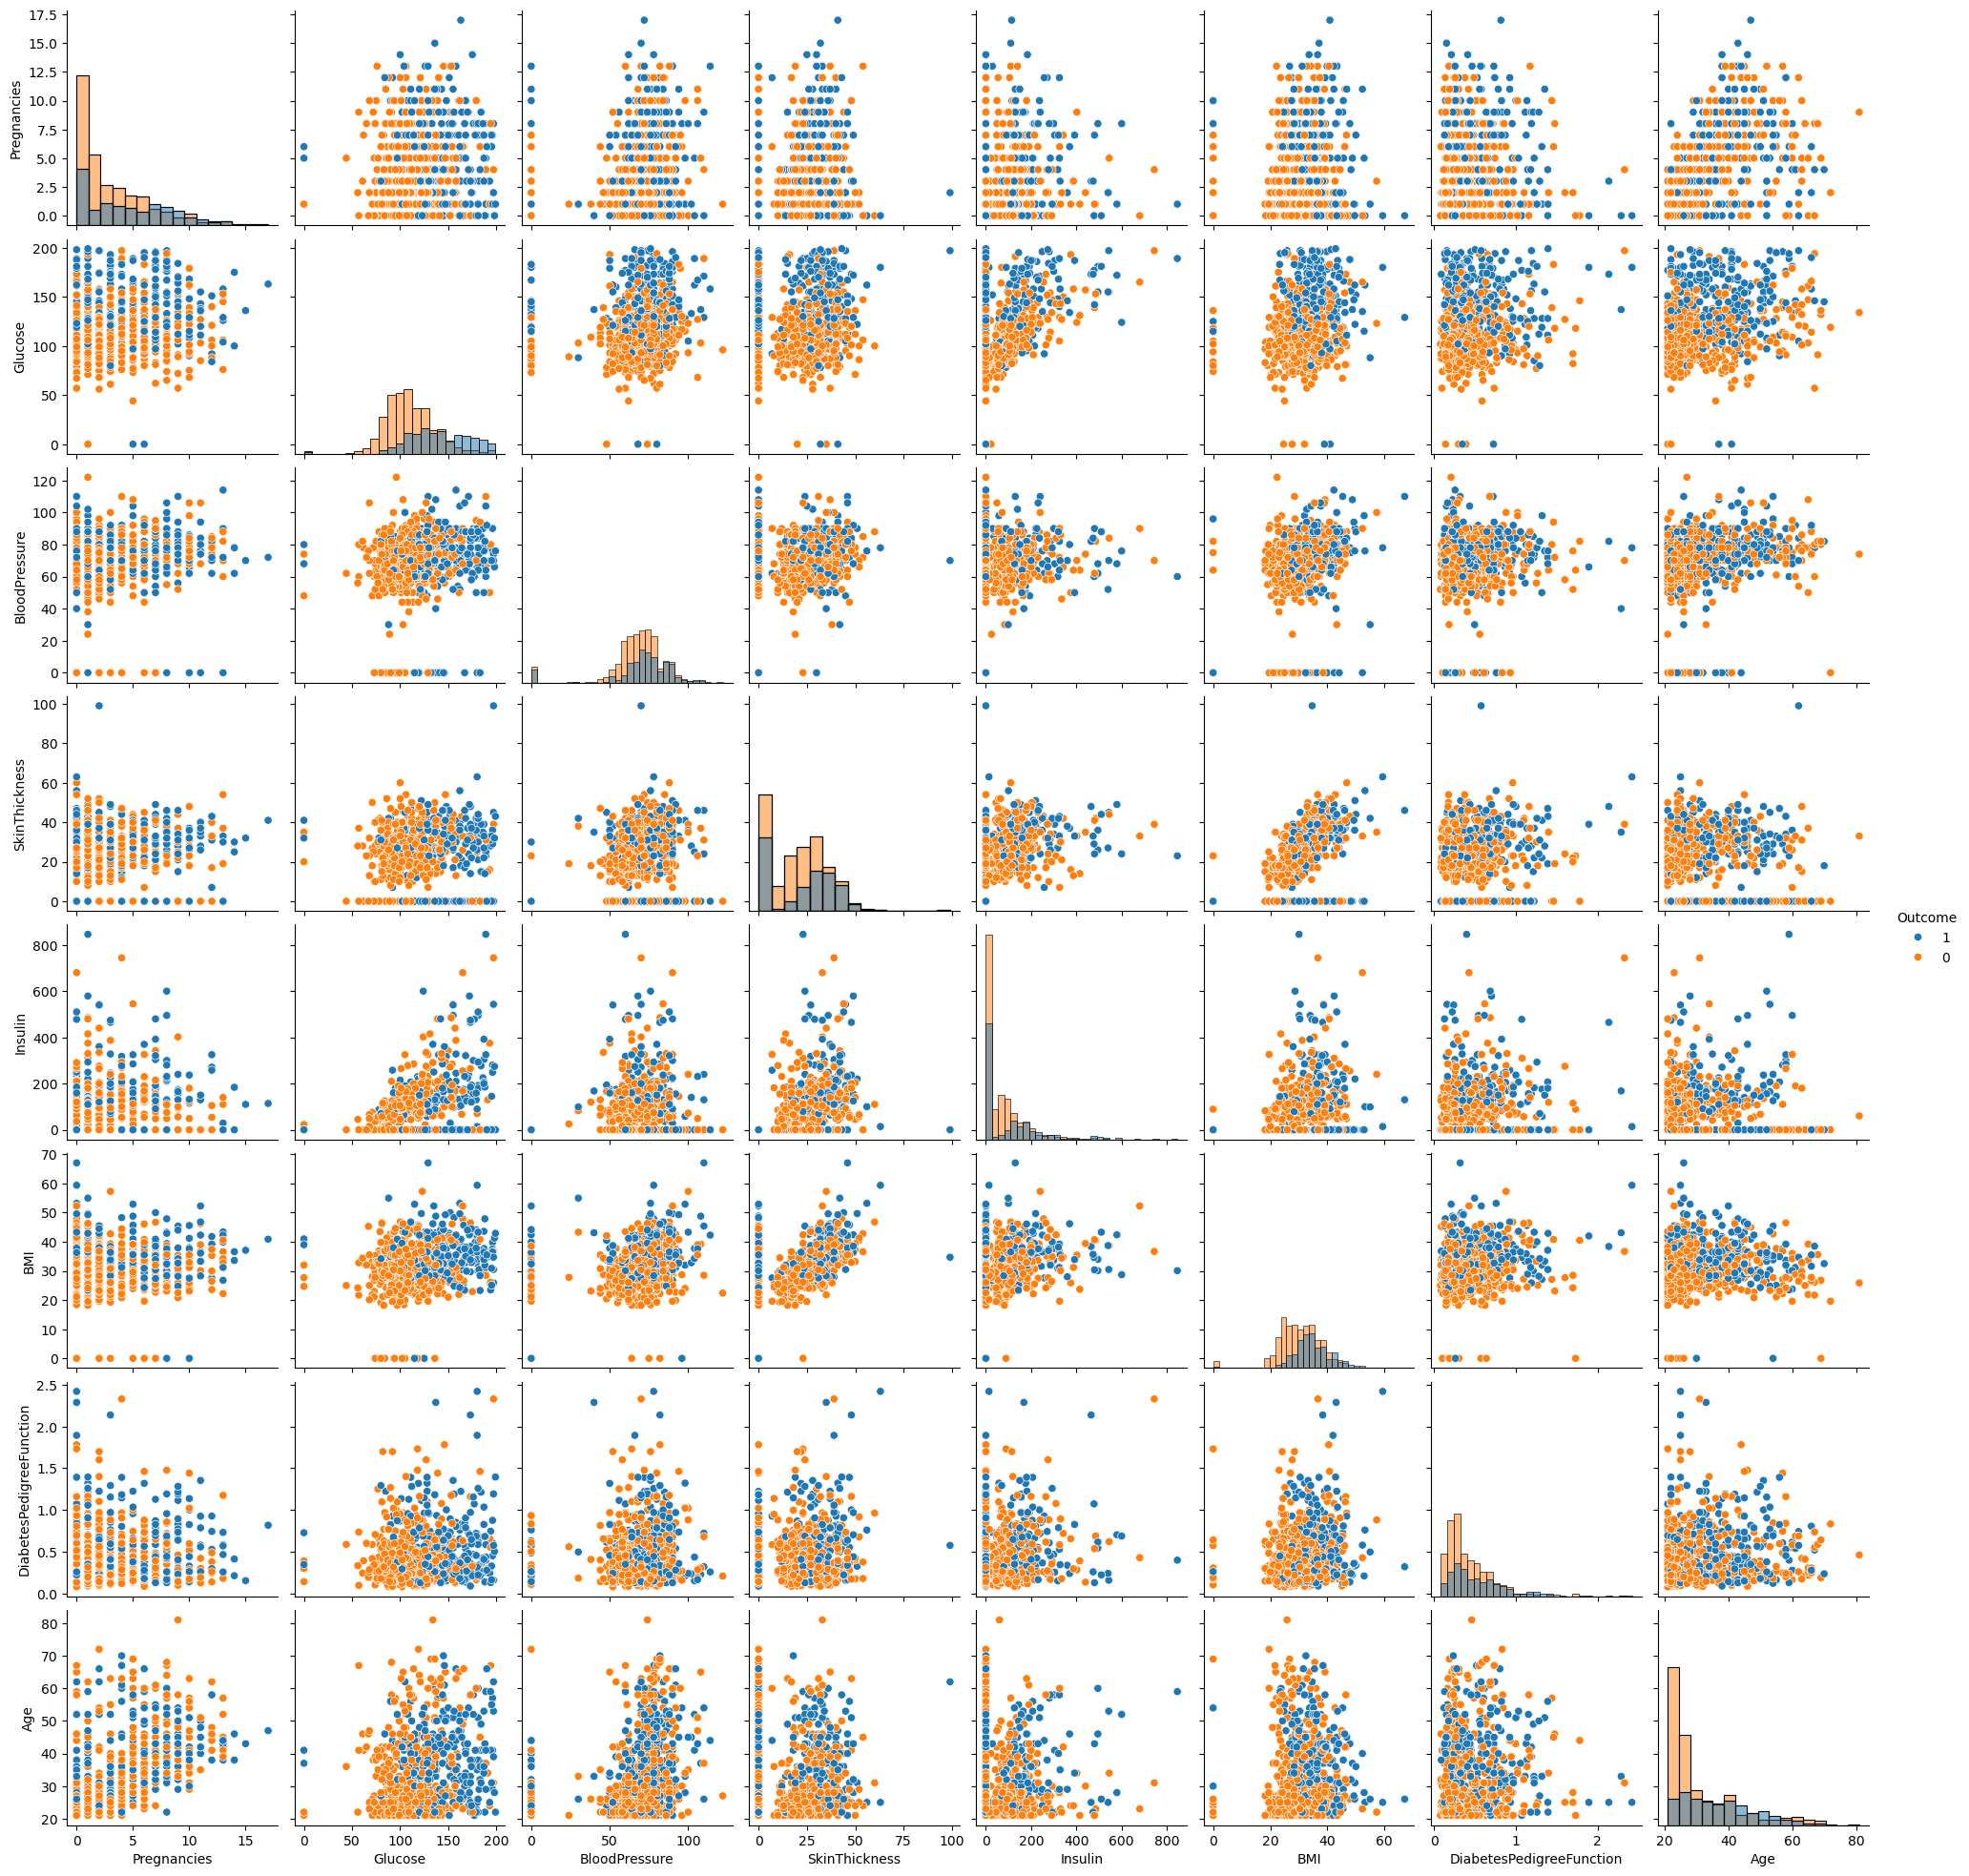

In [17]:
df.hist(figsize=(12, 8), bins=20, edgecolor='black', color='orange')
plt.suptitle("Feature Histograms", fontsize=14)
plt.show()

# Pair Plot (colored by class)
target_col = df.columns[-1]
df[target_col] = df[target_col].astype(str)  # ensure categorical
sns.pairplot(df, hue=target_col, diag_kind="hist")
plt.show()

In [18]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Keep rows where all z-scores < 3 (remove strong outliers)
df_cleaned = df[(z_scores < 3).all(axis=1)]

print("\n✅ df Shape After Outlier Removal:", df_cleaned.shape)
print("🧮 Rows Removed as Outliers:", df.shape[0] - df_cleaned.shape[0])
print("\n📊 Final dfset Info:")
print(df_cleaned.info())
print("\n📈 First 5 Rows of Cleaned df:")
print(df_cleaned.head())


✅ df Shape After Outlier Removal: (688, 9)
🧮 Rows Removed as Outliers: 80

📊 Final dfset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 688 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               688 non-null    int64  
 1   Glucose                   688 non-null    int64  
 2   BloodPressure             688 non-null    int64  
 3   SkinThickness             688 non-null    int64  
 4   Insulin                   688 non-null    int64  
 5   BMI                       688 non-null    float64
 6   DiabetesPedigreeFunction  688 non-null    float64
 7   Age                       688 non-null    int64  
 8   Outcome                   688 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 53.8+ KB
None

📈 First 5 Rows of Cleaned df:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148      

####  Steps:

1. **Split data:**

   * `X` = features, `y` = target (`Outcome`).
2. **Initialize scalers:**

   * `StandardScaler` → scales data to mean 0, std 1.
   * `MinMaxScaler` → scales data to range [0, 1].
3. **Transform data:**

   * Apply both scalers and convert results to DataFrames.
4. **Compare results:**

   * Print average mean/std for StandardScaler and min/max for MinMaxScaler.

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
# --- Define Features and Target ---
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# --- Initialize Scalers ---
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# --- Apply Scalers ---
X_standard = standard_scaler.fit_transform(X)
X_minmax = minmax_scaler.fit_transform(X)

# Convert back to dfFrames for readability
X_standard = pd.DataFrame(X_standard, columns=X.columns)
X_minmax = pd.DataFrame(X_minmax, columns=X.columns)

# --- Compare Scaling Results ---
print("\n📊 Feature Scaling Comparison:")
print("StandardScaler  -> Mean: {:.4f}, Std: {:.4f}".format(X_standard.mean().mean(), X_standard.std().mean()))
print("MinMaxScaler    -> Min: {:.4f}, Max: {:.4f}".format(X_minmax.min().mean(), X_minmax.max().mean()))


📊 Feature Scaling Comparison:
StandardScaler  -> Mean: 0.0000, Std: 1.0007
MinMaxScaler    -> Min: 0.0000, Max: 1.0000


#### Steps:

1. Assigns `X_scaled = X_standard` to use standardized data.
2. Splits the dataset into training and testing sets using `train_test_split` with:

   * `test_size=0.25` (25% test data)
   * `stratify=y` to maintain class balance
3. Prints the shapes of training and testing sets.
4. Displays class distribution in both sets to verify balance.
5. Confirms preprocessing is complete for SVM training.
#### Purpose:
Prepares clean, scaled, and balanced training and test data for building the SVM classifier.


In [20]:
X_scaled = X_standard


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("\n Train-Test Split Summary:")
print("Training set shape:", X_train.shape)
print("Testing set shape :", X_test.shape)
print("\nTraining Class Distribution:\n", y_train.value_counts(normalize=True))
print("\nTesting Class Distribution:\n", y_test.value_counts(normalize=True))


print("\n Data Preprocessing Complete — Ready for SVM Classifier!")


 Train-Test Split Summary:
Training set shape: (576, 8)
Testing set shape : (192, 8)

Training Class Distribution:
 Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

Testing Class Distribution:
 Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

 Data Preprocessing Complete — Ready for SVM Classifier!


####  Overview:

Implements three common **kernel functions** used in SVMs and other kernel-based algorithms.

####  Kernels:

1. **Linear Kernel:**
   ( k(x_i, x_j) = x_i^T x_j )
   → Measures simple dot-product similarity.

2. **Polynomial Kernel:**
   ( k(x_i, x_j) = (\gamma \cdot x_i^T x_j + r)^d )
   → Captures non-linear relations with adjustable degree and constants.

3. **RBF (Gaussian) Kernel:**
   ( k(x_i, x_j) = e^{-\gamma |x_i - x_j|^2} )
   → Measures similarity based on distance; effective for non-linear patterns.

In [21]:
# ------------------------------------------------------
# 2.1 — KERNEL IMPLEMENTATION (FROM SCRATCH)
# ------------------------------------------------------

import numpy as np

# --------------------------------------------
# Linear Kernel
# --------------------------------------------
def linear_kernel(x1, x2):
    """
    Linear Kernel: k(xi, xj) = xi^T * xj
    """
    return np.dot(x1, x2)


# --------------------------------------------
# Polynomial Kernel
# --------------------------------------------
def polynomial_kernel(x1, x2, degree=2, gamma=1, coef0=1):
    """
    Polynomial Kernel: k(xi, xj) = (γ * xi^T * xj + r)^d
    - degree: d (2 or 3 typically)
    - gamma: scaling factor (default 1)
    - coef0: r term (controls influence of higher-order terms)
    """
    return (gamma * np.dot(x1, x2) + coef0) ** degree


# --------------------------------------------
# RBF (Gaussian) Kernel
# --------------------------------------------
def rbf_kernel(x1, x2, gamma=0.1):
    """
    RBF Kernel: k(xi, xj) = exp(-γ * ||xi - xj||²)
    """
    diff = x1 - x2
    return np.exp(-gamma * np.dot(diff, diff))


In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

param_grid = {
    'linear': {
        'C': [0.1, 1, 10, 100]
    },
    'poly': {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1],
        'degree': [2, 3]
    },
    'rbf': {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.001, 0.01, 0.1, 1]
    }
}


####  Steps:

1. **Initialize cross-validation:**

   * Uses `StratifiedKFold(n_splits=5)` to preserve class balance.

2. **Iterate through kernels and parameters:**

   * **Linear, Polynomial, and RBF** kernels are tested.
   * Loops over combinations of `C`, `gamma`, and `degree` (as applicable).

3. **Train & validate:**

   * For each fold: train SVM → predict → record accuracy.
   * Compute mean accuracy across folds.

4. **Store results:**

   * Save kernel type, parameters, and mean accuracy in `results_df`.

In [25]:
results = []  # to store performance results
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for kernel, params in param_grid.items():
    print(f"\n Kernel: {kernel.upper()}")
    
    # -------------------- Linear Kernel --------------------
    if kernel == 'linear':
        for C in params['C']:
            fold_accuracies = []
            for train_idx, test_idx in skf.split(X_scaled, y):
                X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
                
                svm = SVC(kernel='linear', C=C, random_state=42)
                svm.fit(X_train, y_train)
                y_pred = svm.predict(X_test)
                acc = accuracy_score(y_test, y_pred)
                fold_accuracies.append(acc)
            
            mean_acc = np.mean(fold_accuracies)
            results.append([kernel, C, None, None, mean_acc])
            print(f"C={C} → Accuracy={mean_acc:.4f}")

    # -------------------- Polynomial Kernel --------------------
    if kernel == 'poly':
        for C in params['C']:
            for gamma in params['gamma']:
                for degree in params['degree']:
                    fold_accuracies = []
                    for train_idx, test_idx in skf.split(X_scaled, y):
                        X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
                        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
                        
                        svm = SVC(kernel='poly', C=C, gamma=gamma, degree=degree, random_state=42)
                        svm.fit(X_train, y_train)
                        y_pred = svm.predict(X_test)
                        acc = accuracy_score(y_test, y_pred)
                        fold_accuracies.append(acc)
                    
                    mean_acc = np.mean(fold_accuracies)
                    results.append([kernel, C, gamma, degree, mean_acc])
                    print(f"C={C}, γ={gamma}, d={degree} → Accuracy={mean_acc:.4f}")

    # -------------------- RBF Kernel --------------------
    if kernel == 'rbf':
        for C in params['C']:
            for gamma in params['gamma']:
                fold_accuracies = []
                for train_idx, test_idx in skf.split(X_scaled, y):
                    X_train, X_test = X_scaled.iloc[train_idx], X_scaled.iloc[test_idx]
                    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
                    
                    svm = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
                    svm.fit(X_train, y_train)
                    y_pred = svm.predict(X_test)
                    acc = accuracy_score(y_test, y_pred)
                    fold_accuracies.append(acc)
                
                mean_acc = np.mean(fold_accuracies)
                results.append([kernel, C, gamma, None, mean_acc])
                print(f"C={C}, γ={gamma} → Accuracy={mean_acc:.4f}")

# -------------------- Results Summary --------------------
results_df = pd.DataFrame(results, columns=["Kernel", "C", "Gamma", "Degree", "Mean_Accuracy"])

print("\n Rebuilt results_df successfully with", len(results_df), "rows.\n")
display(results_df.head())



 Kernel: LINEAR
C=0.1 → Accuracy=0.7708
C=1 → Accuracy=0.7708
C=10 → Accuracy=0.7708
C=100 → Accuracy=0.7708

 Kernel: POLY
C=0.1, γ=0.001, d=2 → Accuracy=0.6510
C=0.1, γ=0.001, d=3 → Accuracy=0.6510
C=0.1, γ=0.01, d=2 → Accuracy=0.6510
C=0.1, γ=0.01, d=3 → Accuracy=0.6510
C=0.1, γ=0.1, d=2 → Accuracy=0.6563
C=0.1, γ=0.1, d=3 → Accuracy=0.6966
C=0.1, γ=1, d=2 → Accuracy=0.6940
C=0.1, γ=1, d=3 → Accuracy=0.7044
C=1, γ=0.001, d=2 → Accuracy=0.6510
C=1, γ=0.001, d=3 → Accuracy=0.6510
C=1, γ=0.01, d=2 → Accuracy=0.6510
C=1, γ=0.01, d=3 → Accuracy=0.6510
C=1, γ=0.1, d=2 → Accuracy=0.6940
C=1, γ=0.1, d=3 → Accuracy=0.7370
C=1, γ=1, d=2 → Accuracy=0.6940
C=1, γ=1, d=3 → Accuracy=0.6940
C=10, γ=0.001, d=2 → Accuracy=0.6510
C=10, γ=0.001, d=3 → Accuracy=0.6510
C=10, γ=0.01, d=2 → Accuracy=0.6563
C=10, γ=0.01, d=3 → Accuracy=0.6510
C=10, γ=0.1, d=2 → Accuracy=0.6940
C=10, γ=0.1, d=3 → Accuracy=0.7278
C=10, γ=1, d=2 → Accuracy=0.6940
C=10, γ=1, d=3 → Accuracy=0.6940
C=100, γ=0.001, d=2 → Accurac

,Kernel,C,Gamma,Degree,Mean_Accuracy
0,linear,0.1,NaN,NaN,0.770783
1,linear,1.0,NaN,NaN,0.770792
2,linear,10.0,NaN,NaN,0.770792
3,linear,100.0,NaN,NaN,0.770792
4,poly,0.1,0.001,2.0,0.651048


#### Steps:

1. Uses training data (`X_train`, `y_train`) with an **RBF kernel SVM**.
2. Iterates over different `C` values `[0.1, 1, 10, 100]`.
3. For each `C`, trains an SVM and records:

   * Number of support vectors.
   * Percentage of training samples acting as support vectors.
4. Stores results in a DataFrame `support_df`.
5. Plots a line graph (log scale for C) showing how support vectors vary with `C`.

#### Purpose:

To analyze how the **regularization parameter (C)** affects model complexity.

* **Smaller C** → More regularization → More support vectors (smoother boundary).
* **Larger C** → Less regularization → Fewer support vectors (tighter fit).


C=0.1 → Support Vectors: 431 (70.08%)
C=1 → Support Vectors: 361 (58.70%)
C=10 → Support Vectors: 322 (52.36%)
C=100 → Support Vectors: 312 (50.73%)


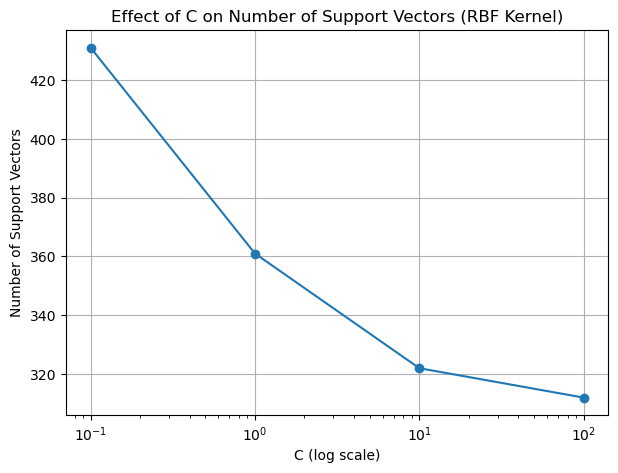

In [26]:

# I'll be using training data from the previous step
# (Assuming X_train, y_train already exist from your preprocessing pipeline)

C_values = [0.1, 1, 10, 100]
support_info = []

for C in C_values:
    svm = SVC(kernel='rbf', C=C, gamma=0.01, random_state=42)
    svm.fit(X_train, y_train)
    n_support = len(svm.support_)
    percent_support = (n_support / len(X_train)) * 100
    support_info.append([C, n_support, percent_support])
    print(f"C={C} → Support Vectors: {n_support} ({percent_support:.2f}%)")

support_df = pd.DataFrame(support_info, columns=['C', 'Support_Vectors', 'Percent'])

# Plot how number of support vectors changes with C
plt.figure(figsize=(7,5))
plt.plot(support_df['C'], support_df['Support_Vectors'], marker='o')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Number of Support Vectors')
plt.title('Effect of C on Number of Support Vectors (RBF Kernel)')
plt.grid(True)
plt.show()

#### Steps:

1. Uses **Linear Kernel SVM** on the training data (`X_train`, `y_train`).
2. Iterates through different regularization values of `C = [0.1, 1, 10, 100]`.
3. For each `C`, trains the model and records:

   * Total number of support vectors.
   * Percentage of training data used as support vectors.
4. Stores the results in a DataFrame `support_df`.
5. Plots the relationship between `C` and the number of support vectors (log scale for C).

#### Purpose:

To observe how **regularization strength (C)** influences model complexity in a **linear SVM**.

* **Low C** → Strong regularization → More support vectors (simpler model).
* **High C** → Weak regularization → Fewer support vectors (more complex model).


C=0.1 → Support Vectors: 330 (53.66%)
C=1 → Support Vectors: 319 (51.87%)
C=10 → Support Vectors: 317 (51.54%)
C=100 → Support Vectors: 317 (51.54%)


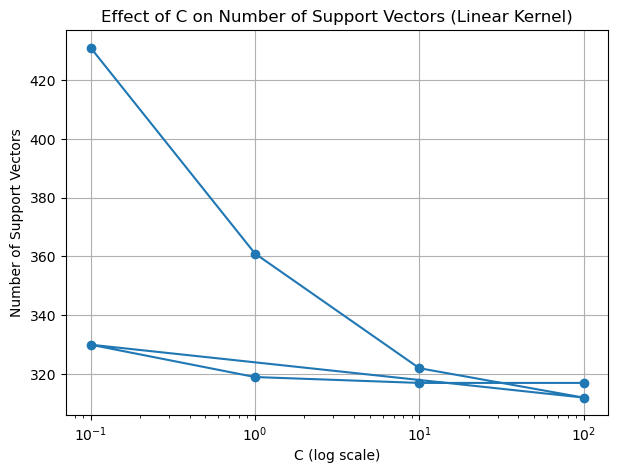

In [27]:
for C in C_values:
    svm = SVC(kernel='linear', C=C, gamma=0.01, random_state=42)
    svm.fit(X_train, y_train)
    n_support = len(svm.support_)
    percent_support = (n_support / len(X_train)) * 100
    support_info.append([C, n_support, percent_support])
    print(f"C={C} → Support Vectors: {n_support} ({percent_support:.2f}%)")

support_df = pd.DataFrame(support_info, columns=['C', 'Support_Vectors', 'Percent'])

# Plot how number of support vectors changes with C
plt.figure(figsize=(7,5))
plt.plot(support_df['C'], support_df['Support_Vectors'], marker='o')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Number of Support Vectors')
plt.title('Effect of C on Number of Support Vectors (Linear Kernel)')
plt.grid(True)
plt.show()

#### Steps:

1. Trains an **SVM with a polynomial kernel** using various `C` values `[0.1, 1, 10, 100]`.
2. For each `C`, it:
   * Fits the model on the training set.
   * Calculates the number and percentage of support vectors.
3. Saves the results in a DataFrame `support_df`.
4. Plots the relationship between `C` and the number of support vectors on a log-scaled x-axis.

#### Purpose:

To study how **regularization parameter (C)** affects the number of support vectors in **polynomial SVMs**.

* **Smaller C** → Stronger regularization → More support vectors.
* **Larger C** → Weaker regularization → Fewer support vectors, tighter fitting decision boundary.


C=0.1 → Support Vectors: 432 (70.24%)
C=1 → Support Vectors: 436 (70.89%)
C=10 → Support Vectors: 438 (71.22%)
C=100 → Support Vectors: 411 (66.83%)


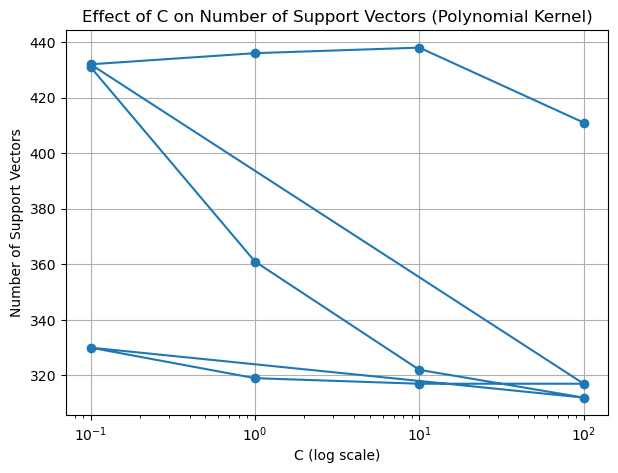

In [28]:
for C in C_values:
    svm = SVC(kernel='poly', C=C, gamma=0.01, random_state=42)
    svm.fit(X_train, y_train)
    n_support = len(svm.support_)
    percent_support = (n_support / len(X_train)) * 100
    support_info.append([C, n_support, percent_support])
    print(f"C={C} → Support Vectors: {n_support} ({percent_support:.2f}%)")

support_df = pd.DataFrame(support_info, columns=['C', 'Support_Vectors', 'Percent'])

# Plot how number of support vectors changes with C
plt.figure(figsize=(7,5))
plt.plot(support_df['C'], support_df['Support_Vectors'], marker='o')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Number of Support Vectors')
plt.title('Effect of C on Number of Support Vectors (Polynomial Kernel)')
plt.grid(True)
plt.show()

#### Steps:

1. **Feature Selection:**

   * Computes absolute correlation with the target (`Outcome`).
   * Selects the top 2 most correlated features for 2D visualization.

2. **Data Preparation:**

   * Scales the selected features using `StandardScaler`.
   * Splits data into training and testing sets with `train_test_split` (stratified).

3. **Kernel Comparison:**

   * Trains SVM models using three kernels: **linear**, **polynomial**, and **RBF**.
   * For each kernel, computes decision boundaries and margins over a 2D grid.

4. **Visualization:**

   * Uses contour plots to show class separation regions.
   * Marks support vectors with hollow circles for clarity.
   * Displays all three kernels side by side for comparison.

#### Purpose:

To visually compare how different **SVM kernels** (linear, polynomial, RBF) separate classes in feature space and how their **decision boundaries** differ in flexibility and shape.


Top 2 features selected for visualization: ['Glucose', 'BMI']


/var/folders/vl/5hbg272x2b53sdq2n610ysz00000gp/T/ipykernel_63153/420772127.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis,
/var/folders/vl/5hbg272x2b53sdq2n610ysz00000gp/T/ipykernel_63153/420772127.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis,
/var/folders/vl/5hbg272x2b53sdq2n610ysz00000gp/T/ipykernel_63153/420772127.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis,


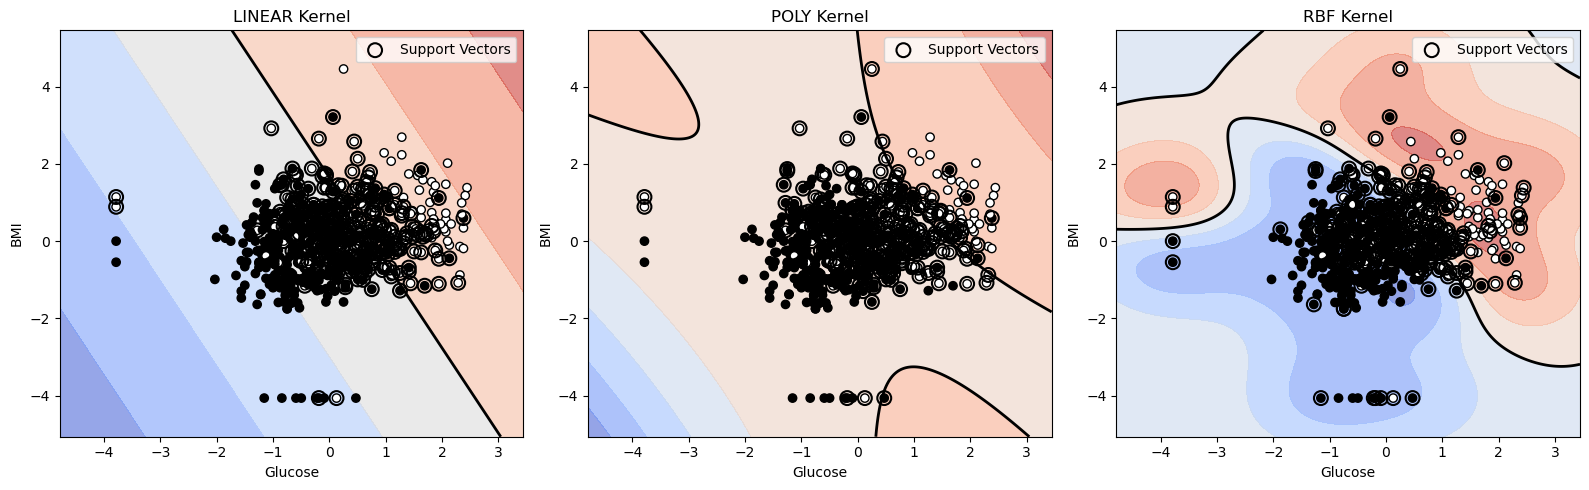

In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

corr = df.corr()["Outcome"].abs().sort_values(ascending=False)
top2_features = corr.index[1:3].tolist()
print("Top 2 features selected for visualization:", top2_features)

X_vis = df[top2_features].values
y_vis = df["Outcome"].values

scaler2 = StandardScaler()
X_vis_scaled = scaler2.fit_transform(X_vis)

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis_scaled, y_vis, test_size=0.25, random_state=42, stratify=y_vis
)

kernels = ['linear', 'poly', 'rbf']

x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

plt.figure(figsize=(16,5))

for i, kernel in enumerate(kernels):
    svm = SVC(kernel=kernel, C=1.0, gamma=0.5, degree=3, random_state=42)
    svm.fit(X_train_vis, y_train_vis)

    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, i+1)
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.6)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis,
                cmap='coolwarm', edgecolors='k')
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', linewidth=1.5,
                label='Support Vectors')

    plt.title(f"{kernel.upper()} Kernel")
    plt.xlabel(top2_features[0])
    plt.ylabel(top2_features[1])
    plt.legend()

plt.tight_layout()
plt.show()

#### Steps:

1. **Feature Selection and Scaling:**

   * Uses top two correlated features for 2D visualization.
   * Standardizes features using `StandardScaler`.

2. **Train–Test Split:**

   * Splits data into training and testing sets with `stratify=y` to preserve class balance.

3. **SVM Training and Margin Calculation:**

   * Trains **Linear SVM** models for multiple `C` values `[0.1, 1, 10, 100]`.
   * Calculates **margin width** using the formula ( \text{Margin} = \frac{2}{||w||} ).
   * Stores margin widths for comparison.

4. **Visualization:**

   * Plots decision boundaries and margins for each `C`.
   * Dashed lines represent margin boundaries (`±1`).
   * Support vectors are marked as hollow circles.
   * Second plot shows how **margin width decreases** as `C` increases.

#### Purpose:

To demonstrate how the **regularization parameter (C)** in a **linear SVM** affects the margin width:

* **Smaller C** → Larger margin → Simpler model (more regularization).
* **Larger C** → Narrower margin → Tighter fit to training data (less regularization).


/var/folders/vl/5hbg272x2b53sdq2n610ysz00000gp/T/ipykernel_63153/895965231.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_m[:, 0], X_train_m[:, 1], c=y_train_m, cmap='coolwarm', edgecolors='k')
/var/folders/vl/5hbg272x2b53sdq2n610ysz00000gp/T/ipykernel_63153/895965231.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_m[:, 0], X_train_m[:, 1], c=y_train_m, cmap='coolwarm', edgecolors='k')
/var/folders/vl/5hbg272x2b53sdq2n610ysz00000gp/T/ipykernel_63153/895965231.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_m[:, 0], X_train_m[:, 1], c=y_train_m, cmap='coolwarm', edgecolors='k')
/var/folders/vl/5hbg272x2b53sdq2n610ysz00000gp/T/ipykernel_63153/895965231.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_m[:, 0],

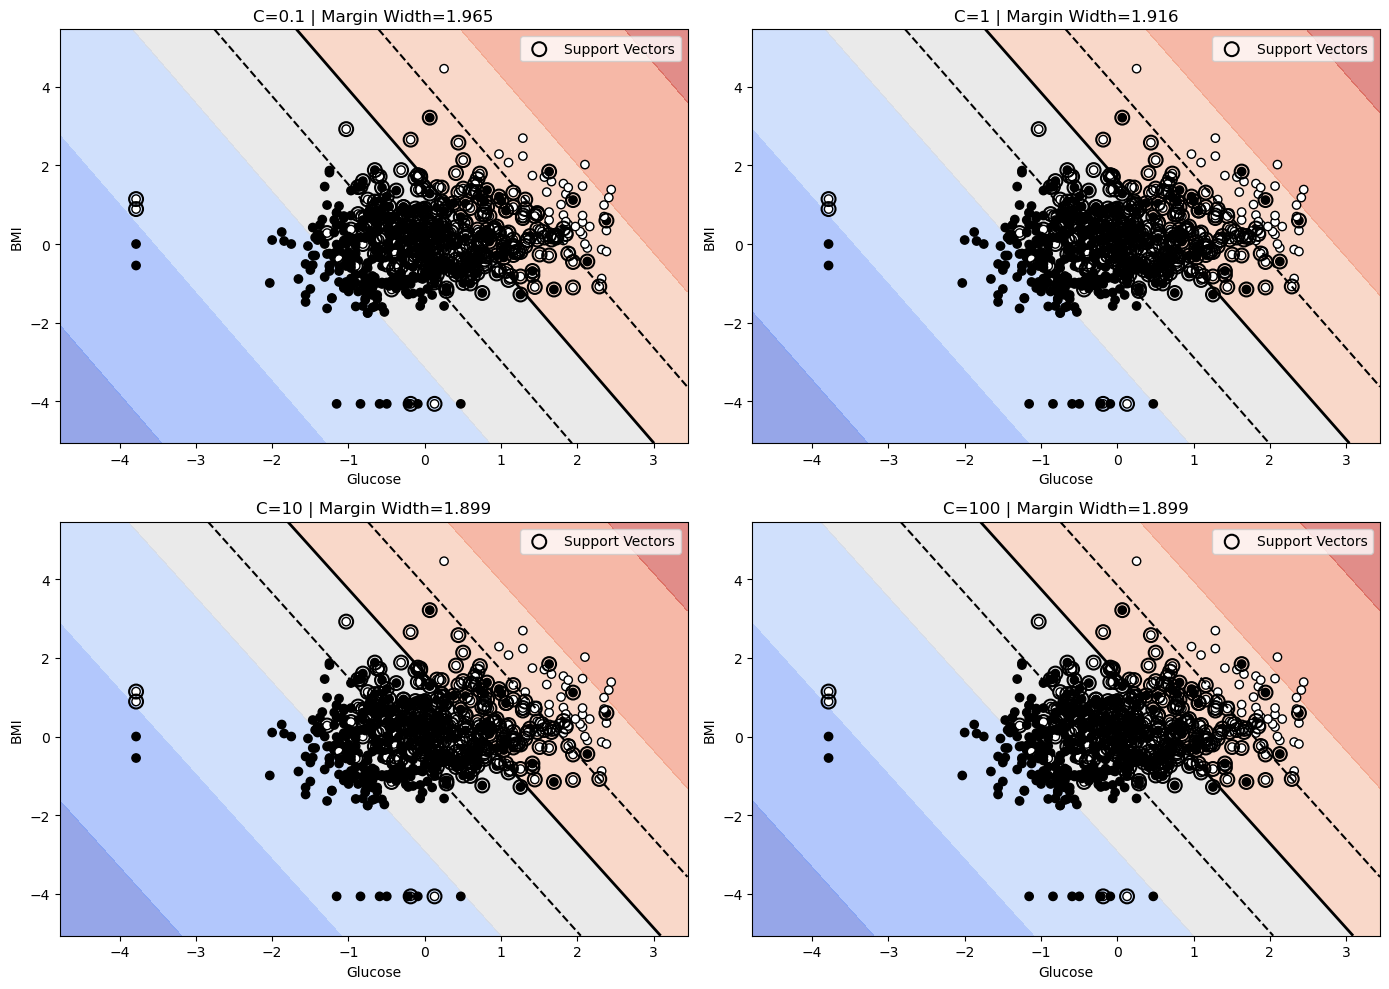

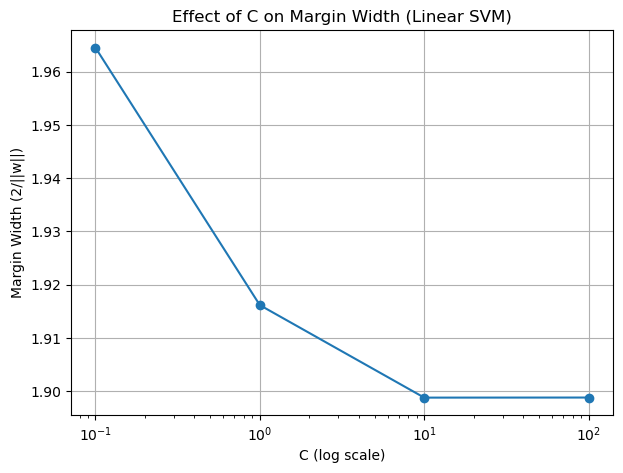


 Margin Widths for Different C Values:

       C  Margin_Width
0    0.1      1.964535
1    1.0      1.916155
2   10.0      1.898775
3  100.0      1.898790


In [30]:
# Using only two top correlated features for visual simplicity
X_margin = df[top2_features].values
y_margin = df["Outcome"].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_margin_scaled = scaler.fit_transform(X_margin)

from sklearn.model_selection import train_test_split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_margin_scaled, y_margin, test_size=0.25, random_state=42, stratify=y_margin
)

C_values = [0.1, 1, 10, 100]
margins = []

plt.figure(figsize=(14, 10))

for i, C in enumerate(C_values, 1):
    svm = SVC(kernel='linear', C=C, random_state=42)
    svm.fit(X_train_m, y_train_m)

    # Margin: 2 / ||w||
    w = svm.coef_[0]
    margin = 2 / np.linalg.norm(w)
    margins.append((C, margin))
    
    plt.subplot(2, 2, i)
    plt.title(f"C={C} | Margin Width={margin:.3f}")
    
    # Creating mesh grid for plotting
    x_min, x_max = X_margin_scaled[:, 0].min() - 1, X_margin_scaled[:, 0].max() + 1
    y_min, y_max = X_margin_scaled[:, 1].min() - 1, X_margin_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.6)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    plt.contour(xx, yy, Z, levels=[-1, 1], linewidths=1.5, colors='k', linestyles='dashed')
    
    plt.scatter(X_train_m[:, 0], X_train_m[:, 1], c=y_train_m, cmap='coolwarm', edgecolors='k')
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', linewidth=1.5, label='Support Vectors')
    
    plt.xlabel(top2_features[0])
    plt.ylabel(top2_features[1])
    plt.legend()

plt.tight_layout()
plt.show()


margins_df = pd.DataFrame(margins, columns=["C", "Margin_Width"])

plt.figure(figsize=(7,5))
plt.plot(margins_df["C"], margins_df["Margin_Width"], marker='o')
plt.xscale("log")
plt.xlabel("C (log scale)")
plt.ylabel("Margin Width (2/||w||)")
plt.title("Effect of C on Margin Width (Linear SVM)")
plt.grid(True)
plt.show()

print("\n Margin Widths for Different C Values:\n")
print(margins_df)


#### Steps:

1. **Train the Best Model:**

   * Uses `SVC(kernel='rbf', C=10, gamma=0.01)` as determined from prior grid search.
   * Fits the model on `X_train`, `y_train`, and predicts on `X_test`.

2. **Manual Confusion Matrix:**

   * Implements a function to compute the confusion matrix from scratch by counting `(true, predicted)` label pairs.
   * Displays the matrix as a labeled DataFrame.

3. **Manual Metric Computation:**

   * Defines functions to calculate **accuracy**, **precision**, **recall**, and **F1-score** manually (both macro and weighted averages).
   * Derives true positives (TP), false positives (FP), and false negatives (FN) directly from the confusion matrix.

4. **Metric Display:**

   * Prints manually computed metrics: Accuracy, Macro Precision/Recall/F1, and Weighted Precision/Recall/F1.

#### Purpose:

To validate understanding of **evaluation metrics** by computing them **manually** instead of using built-in functions, ensuring deeper insight into **SVM model performance** and class-level behavior.


Confusion Matrix:
          Pred 0  Pred 1
Actual 0      86      14
Actual 1      21      32

🎯 From-Scratch Metrics (RBF Kernel, C=10, γ=0.01):
Accuracy: 0.7712
Macro Precision: 0.7497 | Macro Recall: 0.7319 | Macro F1: 0.7387
Weighted Precision: 0.7663 | Weighted Recall: 0.7712 | Weighted F1: 0.7670


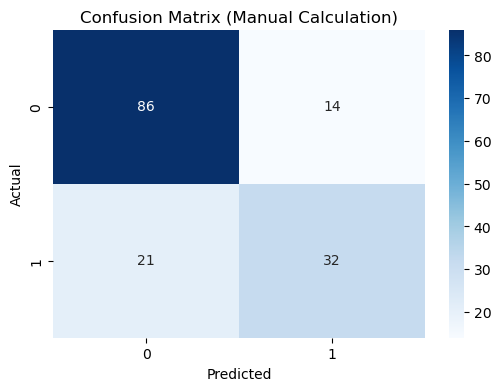

In [31]:
# Train best model (based on Grid Search)
best_model = SVC(kernel='rbf', C=10, gamma=0.01, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

def confusion_matrix_manual(y_true, y_pred):
    classes = np.unique(y_true)
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    for i, true in enumerate(classes):
        for j, pred in enumerate(classes):
            matrix[i, j] = np.sum((y_true == true) & (y_pred == pred))
    return matrix, classes

cm, classes = confusion_matrix_manual(y_test.values, y_pred)

print("Confusion Matrix:")
print(pd.DataFrame(cm, index=[f"Actual {c}" for c in classes],
                      columns=[f"Pred {c}" for c in classes]))


def accuracy_manual(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def precision_recall_f1_manual(cm):
    precisions, recalls, f1s = [], [], []
    total_samples = np.sum(cm)
    weighted_prec_sum, weighted_rec_sum, weighted_f1_sum = 0, 0, 0

    for i in range(len(cm)):
        tp = cm[i, i]
        fp = np.sum(cm[:, i]) - tp
        fn = np.sum(cm[i, :]) - tp
        support = np.sum(cm[i, :])
        
        prec = tp / (tp + fp) if (tp + fp) != 0 else 0
        rec = tp / (tp + fn) if (tp + fn) != 0 else 0
        f1 = (2 * prec * rec) / (prec + rec) if (prec + rec) != 0 else 0

        precisions.append(prec)
        recalls.append(rec)
        f1s.append(f1)
        
        # Weighted averages
        weighted_prec_sum += prec * support
        weighted_rec_sum += rec * support
        weighted_f1_sum += f1 * support

    macro_precision = np.mean(precisions)
    macro_recall = np.mean(recalls)
    macro_f1 = np.mean(f1s)

    weighted_precision = weighted_prec_sum / total_samples
    weighted_recall = weighted_rec_sum / total_samples
    weighted_f1 = weighted_f1_sum / total_samples

    return (macro_precision, macro_recall, macro_f1,
            weighted_precision, weighted_recall, weighted_f1)

# Compute metrics
acc = accuracy_manual(y_test.values, y_pred)
macro_p, macro_r, macro_f1, w_p, w_r, w_f1 = precision_recall_f1_manual(cm)

print("\n🎯 From-Scratch Metrics (RBF Kernel, C=10, γ=0.01):")
print(f"Accuracy: {acc:.4f}")
print(f"Macro Precision: {macro_p:.4f} | Macro Recall: {macro_r:.4f} | Macro F1: {macro_f1:.4f}")
print(f"Weighted Precision: {w_p:.4f} | Weighted Recall: {w_r:.4f} | Weighted F1: {w_f1:.4f}")


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix (Manual Calculation)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### 1. Test Accuracy Comparison (Bar Plot)

* Groups results by kernel type (`linear`, `poly`, `rbf`) and plots the **maximum mean cross-validation accuracy** for each.
* Provides a quick comparison of how different kernels perform on the dataset.

#### 2. RBF Kernel Grid Search Heatmap

* Creates a pivot table of **mean accuracies** for RBF kernel combinations of `C` and `gamma`.
* Displays a heatmap to visualize which parameter settings yield the best performance.

#### 3. Learning Curve (Manual)

* Trains an **RBF SVM** on increasing portions of the training data.
* Plots **training vs validation accuracy** to analyze model learning behavior:

  * Convergence of both curves indicates good generalization.
  * Wide gaps indicate possible overfitting.

#### 4. Support Vector Count vs C

* Trains RBF SVM models with varying `C` values (`0.1, 1, 10, 100`).
* Plots how the **number of support vectors** decreases as **C increases**, showing the effect of regularization.

#### Purpose:

These plots collectively summarize **SVM model performance**, **hyperparameter influence**, and **training behavior**, enabling data-driven kernel and parameter selection.


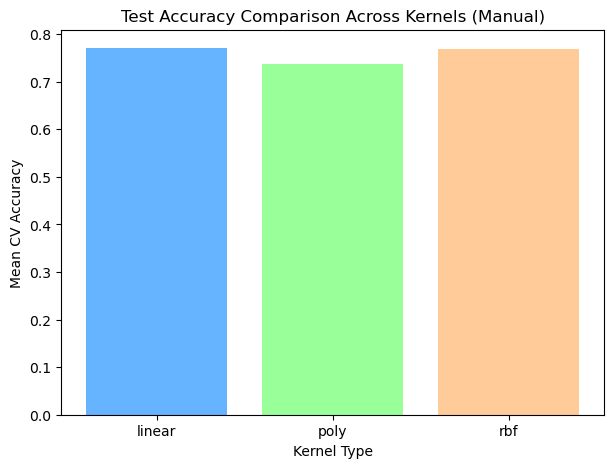

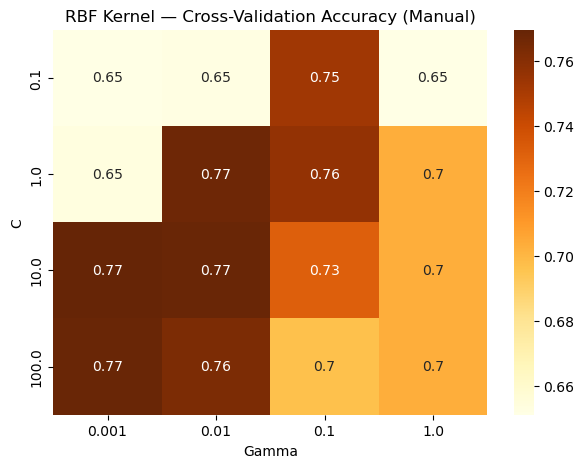

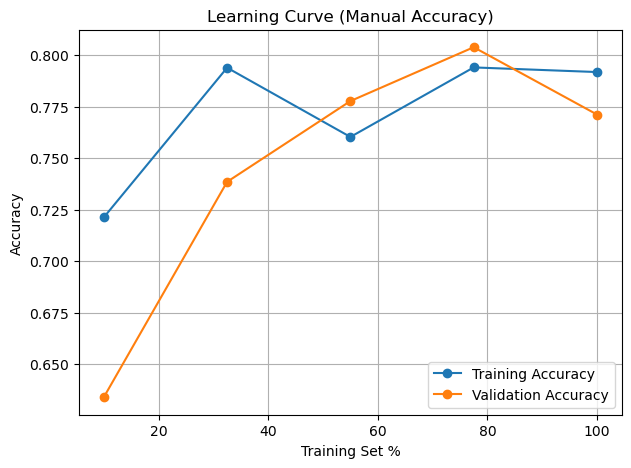

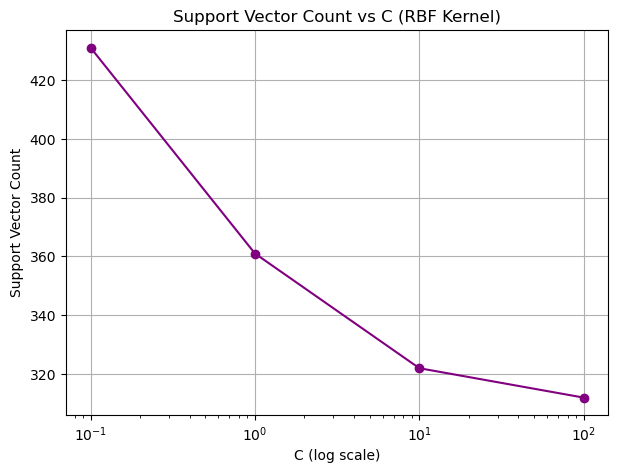

In [32]:
#Bar Plot — Test Accuracy Across Kernels
kernel_acc = results_df.groupby("Kernel")["Mean_Accuracy"].max().reset_index()

plt.figure(figsize=(7,5))
plt.bar(kernel_acc["Kernel"], kernel_acc["Mean_Accuracy"], color=['#66b3ff','#99ff99','#ffcc99'])
plt.title("Test Accuracy Comparison Across Kernels (Manual)")
plt.xlabel("Kernel Type")
plt.ylabel("Mean CV Accuracy")
plt.show()

# Heatmap — Cross-validation Grid for RBF Kernel
rbf_data = results_df[results_df["Kernel"] == "rbf"].pivot_table(
    index="C", columns="Gamma", values="Mean_Accuracy"
)

plt.figure(figsize=(7,5))
sns.heatmap(rbf_data, annot=True, cmap="YlOrBr")
plt.title("RBF Kernel — Cross-Validation Accuracy (Manual)")
plt.ylabel("C")
plt.xlabel("Gamma")
plt.show()

# Learning Curve (Manual)
train_sizes = np.linspace(0.1, 1.0, 5)
train_acc, val_acc = [], []

for size in train_sizes:
    subset = int(len(X_train) * size)
    X_sub, y_sub = X_train[:subset], y_train[:subset]
    
    model = SVC(kernel='rbf', C=10, gamma=0.01, random_state=42)
    model.fit(X_sub, y_sub)
    
    train_acc.append(accuracy_manual(y_sub, model.predict(X_sub)))
    val_acc.append(accuracy_manual(y_test, model.predict(X_test)))

plt.figure(figsize=(7,5))
plt.plot(train_sizes * 100, train_acc, marker='o', label="Training Accuracy")
plt.plot(train_sizes * 100, val_acc, marker='o', label="Validation Accuracy")
plt.title("Learning Curve (Manual Accuracy)")
plt.xlabel("Training Set %")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Support Vector Count vs C
C_values = [0.1, 1, 10, 100]
sv_counts = []

for C in C_values:
    model = SVC(kernel='rbf', C=C, gamma=0.01, random_state=42)
    model.fit(X_train, y_train)
    sv_counts.append((C, len(model.support_)))

sv_df = pd.DataFrame(sv_counts, columns=["C", "Support_Vectors"])

plt.figure(figsize=(7,5))
plt.plot(sv_df["C"], sv_df["Support_Vectors"], marker='o', color='purple')
plt.xscale("log")
plt.xlabel("C (log scale)")
plt.ylabel("Support Vector Count")
plt.title("Support Vector Count vs C (RBF Kernel)")
plt.grid(True)
plt.show()
